# DATA PREPROCESSING

In [1]:
#MERGING_DATA
%cd \Users\eaauggr\Downloads\churn


C:\Users\eaauggr\Downloads\churn


In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
train_data = pd.read_csv('train_v2.csv')
members_data = pd.read_csv('members_v3.csv')
transactions_data = pd.read_csv('transactions_v2.csv')
user_logs_data = pd.read_csv('user_logs_v2.csv')


In [4]:
train_members = pd.merge(train_data, members_data, on='msno', how='left')
train_mem_trans = pd.merge(train_members, transactions_data, on='msno', how='left')
training_dataset = pd.merge(train_mem_trans, user_logs_data, on='msno', how='left')
training_dataset.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170305.0,7.0,0.0,3.0,5.0,71.0,68.0,17599.893
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170301.0,138.0,19.0,7.0,1.0,21.0,158.0,8830.433
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170319.0,0.0,0.0,0.0,0.0,34.0,17.0,7883.313
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170316.0,15.0,0.0,0.0,1.0,38.0,17.0,9029.227
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170310.0,0.0,0.0,0.0,0.0,8.0,8.0,1870.110


In [5]:
def preprocessing(data):
    '''This preprocessing function is used to perform outliers removal, nan imputation '''
    
    # nan = 0  in city 
    data['city'] = data['city'].fillna(0)

    # removing outliers
    data['bd'] = data['bd'].apply(lambda x: x if (x < 60.0) and (x > 0.0) else np.nan)
    # nan = median age in bd
    data['bd'] = data['bd'].fillna(19.0)

    #  male = 1 in gender
    data['gender'] = data['gender'].replace(to_replace='male', value=1)
    #  male = 2 in gender
    data['gender'] = data['gender'].replace(to_replace='female', value=2)
    #  nan = 0 in gender
    data['gender'] = data['gender'].fillna(0)

    # nan = 0 in registered_via
    data['registered_via'] = data['registered_via'].fillna(0)

    # nan = median date in the registration_init_time
    data['registration_init_time'] = data['registration_init_time'].fillna(20131114.0)
    # converting float date to datetime
    #data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format='%Y%m%d')

    # nan = 0 in payment_method_id
    data['payment_method_id'] = data['payment_method_id'].fillna(0)
    
    # nan = 30 in payment_plan_days
    data['payment_plan_days'] = data['payment_plan_days'].fillna(30.0)

    # nan = 149 in  plan_list_price
    data['plan_list_price'] = data['plan_list_price'].fillna(149.0)

    # nan = 149 in actual_amount_paid
    data['actual_amount_paid'] = data['actual_amount_paid'].fillna(149.0)

    # nan =  2 in is_auto_renew (2 is not mentioned)
    data['is_auto_renew'] = data['is_auto_renew'].fillna(2)

    # nan = median date in transaction_date
    data['transaction_date'] = data['transaction_date'].fillna(20170315.0)
    # converting float date to datetime
    #data['transaction_date'] = pd.to_datetime(data['transaction_date'], format='%Y%m%d')

    # nan = median date in membership_expire_date
    data['membership_expire_date'] = data['membership_expire_date'].fillna(20170419.0)
    # converting float date to datetime
    #data['membership_expire_date'] = pd.to_datetime(data['membership_expire_date'], format='%Y%m%d')

    #  nan =  2 in is_cancel (2 is not mentioned)
    data['is_cancel'] = data['is_cancel'].fillna(2)

    # nan = median date in 'date'
    data['date'] = data['date'].fillna(20170316.0)
    # converting float date to datetime
    #data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

    # removing outliers
    data['num_25'] = data['num_25'].apply(lambda x: x if (x <= 56.0) else np.nan)
    #  nan = 2 in num_25
    data['num_25'] = data['num_25'].fillna(2.0)

    # removing outliers
    data['num_50'] = data['num_50'].apply(lambda x: x if (x <= 21.0) else np.nan)
    # nan = 0 in num_50
    data['num_50'] = data['num_50'].fillna(0)

    # removing outliers
    data['num_75'] = data['num_75'].apply(lambda x: x if (x <= 10.0) else np.nan)
    # nan = 0 in num_75
    data['num_75'] = data['num_75'].fillna(0)

    # removing outliers
    data['num_985'] = data['num_985'].apply(lambda x: x if (x <= 11.0) else np.nan)
    # nan = 0 in num_985
    data['num_985'] = data['num_985'].fillna(0)

    # removing outliers
    data['num_100'] = data['num_100'].apply(lambda x: x if (x <= 75.0) else np.nan)
    # nan = 17 in num_100
    data['num_100'] = data['num_100'].fillna(14.0)

    # removing outliers
    data['num_unq'] = data['num_unq'].apply(lambda x: x if (x <= 69.0) else np.nan)
    #nan = 18 in num_unq
    data['num_unq'] = data['num_unq'].fillna(16.0)

    # removing outliers
    data['total_secs'] = data['total_secs'].apply(lambda x: x if (x <= 19476.59) else np.nan)
    # nan = 4548 in total_secs
    data['total_secs'] = data['total_secs'].fillna(4548.5495)

In [6]:
preprocessing(training_dataset)

#  Preaparing Dataset

In [7]:
%%time
# Feature - 4 to 12 (sum based features)
# Feature - 13 to 19 (mean based features)
# Feature - 20 to 27 (standard deviation based features)
# Feature - 28 (nunique based feature)
# Feature - 29 and 30 (min and max based features)
# Feature - 31 to 33 (mean based features for transaction)
# Feature - 34 (transaction count)
# Feature - 35 (transaction date max)
# Feature - 36 (membership expiry date max)
# Feature - 37 (membership expiry date count)

def std(x):
    '''finding standard deviation using numpy,
    to avoid getting nan values'''
    return np.std(x)

# grouping them together for train data
temp_df_train = training_dataset.groupby('msno').agg(num_25_sum=('num_25', 'sum'),
                                num_50_sum=('num_50', 'sum'),
                                num_75_sum=('num_75', 'sum'),
                                num_985_sum=('num_985', 'sum'),
                                num_100_sum=('num_100', 'sum'),
                                num_unq_sum=('num_unq', 'sum'),
                                total_secs_sum=('total_secs', 'sum'),
                                num_25_mean=('num_25', 'mean'),
                                num_50_mean=('num_50', 'mean'),
                                num_75_mean=('num_75', 'mean'),
                                num_985_mean=('num_985', 'mean'),
                                num_100_mean=('num_100', 'mean'),
                                num_unq_mean=('num_unq', 'mean'),
                                total_secs_mean=('total_secs', 'mean'))
# merging them with the train dataset
training_dataset = pd.merge(training_dataset, temp_df_train, on='msno', how='left')

Wall time: 34.9 s


In [8]:
training_dataset.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,num_100_sum,num_unq_sum,total_secs_sum,num_25_mean,num_50_mean,num_75_mean,num_985_mean,num_100_mean,num_unq_mean,total_secs_mean
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,246.0,206.0,65167.7615,4.545455,2.090909,1.181818,0.909091,22.363636,18.727273,5924.341955
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,246.0,206.0,65167.7615,4.545455,2.090909,1.181818,0.909091,22.363636,18.727273,5924.341955
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,246.0,206.0,65167.7615,4.545455,2.090909,1.181818,0.909091,22.363636,18.727273,5924.341955
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,246.0,206.0,65167.7615,4.545455,2.090909,1.181818,0.909091,22.363636,18.727273,5924.341955
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,246.0,206.0,65167.7615,4.545455,2.090909,1.181818,0.909091,22.363636,18.727273,5924.341955


In [9]:
mean_encode = training_dataset.groupby('gender')['is_churn'].mean()
print(mean_encode)
training_dataset.loc[:, 'gender_mean_enc'] = training_dataset['gender'].map(mean_encode)
del training_dataset["gender"]

gender
0.0    0.066529
1.0    0.122148
2.0    0.122622
Name: is_churn, dtype: float64


In [10]:
mean_encode = training_dataset.groupby('city')['is_churn'].mean()
print(mean_encode)
training_dataset.loc[:, 'city_mean_enc'] = training_dataset['city'].map(mean_encode)
del training_dataset["city"]

city
0.0     0.072946
1.0     0.061985
3.0     0.124643
4.0     0.127294
5.0     0.125897
6.0     0.123390
7.0     0.103556
8.0     0.135440
9.0     0.120239
10.0    0.128466
11.0    0.108170
12.0    0.131956
13.0    0.121367
14.0    0.119767
15.0    0.120064
16.0    0.106497
17.0    0.086825
18.0    0.108912
19.0    0.132186
20.0    0.079262
21.0    0.138192
22.0    0.115256
Name: is_churn, dtype: float64


In [11]:
mean_encode = training_dataset.groupby('payment_method_id')['is_churn'].mean()
print(mean_encode)
training_dataset.loc[:, 'payment_method_id_mean_enc'] = training_dataset['payment_method_id'].map(mean_encode)
del training_dataset["payment_method_id"]

payment_method_id
0.0     0.109574
3.0     1.000000
6.0     1.000000
8.0     0.852273
10.0    0.196382
11.0    0.015400
12.0    0.947433
13.0    0.994592
14.0    0.052452
15.0    0.910628
16.0    0.165079
17.0    0.895794
18.0    0.009904
19.0    0.021050
20.0    0.991945
21.0    0.060914
22.0    0.993191
23.0    0.057582
26.0    0.609262
27.0    0.033693
28.0    0.238390
29.0    0.092717
30.0    0.075253
31.0    0.023816
32.0    0.960869
33.0    0.035524
34.0    0.032791
35.0    0.863726
36.0    0.093306
37.0    0.026523
38.0    0.276168
39.0    0.055477
40.0    0.065581
41.0    0.054938
Name: is_churn, dtype: float64


In [12]:
mean_encode = training_dataset.groupby('is_cancel')['is_churn'].mean()
print(mean_encode)
training_dataset.loc[:, 'is_cancel_mean_enc'] = training_dataset['is_cancel'].map(mean_encode)
del training_dataset["is_cancel"]

is_cancel
0.0    0.085165
1.0    0.376420
2.0    0.109574
Name: is_churn, dtype: float64


In [13]:
mean_encode = training_dataset.groupby('registered_via')['is_churn'].mean()
print(mean_encode)
training_dataset.loc[:, 'registered_via_mean_enc'] = training_dataset['registered_via'].map(mean_encode)
del training_dataset["registered_via"]

registered_via
0.0     0.072946
3.0     0.146431
4.0     0.194327
7.0     0.050228
9.0     0.120079
13.0    0.045631
Name: is_churn, dtype: float64


In [14]:
mean_encode = training_dataset.groupby('is_auto_renew')['is_churn'].mean()
print(mean_encode)
training_dataset.loc[:, 'is_auto_renew_mean_enc'] = training_dataset['is_auto_renew'].map(mean_encode)
del training_dataset["is_auto_renew"]

is_auto_renew
0.0    0.345160
1.0    0.055275
2.0    0.109574
Name: is_churn, dtype: float64


In [15]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('msno') and str(feature_name)!=str('is_churn')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1


train_data = normalize(training_dataset)

In [16]:
train_data.head()

,msno,is_churn,bd,registration_init_time,payment_plan_days,plan_list_price,actual_amount_paid,transaction_date,membership_expire_date,date,...,num_985_mean,num_100_mean,num_unq_mean,total_secs_mean,gender_mean_enc,city_mean_enc,payment_method_id_mean_enc,is_cancel_mean_enc,registered_via_mean_enc,is_auto_renew_mean_enc
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,0.465517,0.698681,0.066667,0.0745,0.0745,0.999209,0.003174,0.133333,...,0.082645,0.298182,0.260695,0.305206,0.991552,0.838665,0.100667,0.083807,0.677892,0.187312
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,0.465517,0.698681,0.066667,0.0745,0.0745,0.999209,0.003174,0.000000,...,0.082645,0.298182,0.260695,0.305206,0.991552,0.838665,0.100667,0.083807,0.677892,0.187312
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,0.465517,0.698681,0.066667,0.0745,0.0745,0.999209,0.003174,0.600000,...,0.082645,0.298182,0.260695,0.305206,0.991552,0.838665,0.100667,0.083807,0.677892,0.187312
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,0.465517,0.698681,0.066667,0.0745,0.0745,0.999209,0.003174,0.500000,...,0.082645,0.298182,0.260695,0.305206,0.991552,0.838665,0.100667,0.083807,0.677892,0.187312
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,0.465517,0.698681,0.066667,0.0745,0.0745,0.999209,0.003174,0.300000,...,0.082645,0.298182,0.260695,0.305206,0.991552,0.838665,0.100667,0.083807,0.677892,0.187312


In [17]:
Y_train = train_data['is_churn'].values
#train_data.drop(['is_churn','msno'], axis=1, inplace=True)

In [18]:
X_train = train_data

In [19]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.8, stratify=Y_train)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train)

In [25]:
X_train.drop(['is_churn','msno'], axis=1, inplace=True)
X_cv.drop(['is_churn','msno'], axis=1, inplace=True)

In [26]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_cv.shape, Y_cv.shape)

(2503424, 35) (2503424,)
(12517126, 37) (12517126,)
(625857, 35) (625857,)


In [28]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import log_loss
from datetime import datetime
from sklearn.calibration import CalibratedClassifierCV

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
def result(y_pred,y_pred_proba,y_true,confusion=0,silent=0):
    """
    Function require 3 inputs
    predicted value
    predicted probabilities
    true labels
    final 1 or 0 
    if 1 confusion matrix will be printed
    """
    loss=log_loss(y_true,y_pred_proba)
    if silent==0:
        print("log loss is ",loss)
        print('F1 score is',f1_score(y_true,y_pred))
    if confusion==1:
        cf_matrix = confusion_matrix(y_true, y_pred)
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.show()
    return loss

def lowest(hyperparameter,loss_all):
    """
    this function return the
    best hyperparameter and lowest loss associated with it
    """
    lowest_loss_index=np.argsort(loss_all)[0]
    lowest_loss=loss_all[lowest_loss_index]
    hyperparameter=hyperparameter[lowest_loss_index]
    print( 'The best hyperparameter is ',hyperparameter,'and the lowest loss associaed with it ',lowest_loss)
    return hyperparameter
def plot_result(hyperparameter,loss_all):
    figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
    sns.scatterplot(x=hyperparameter,y=loss_all)
    plt.plot()

In [31]:
from lightgbm import LGBMClassifier 
hyp=[]
feature_importance_lgb=[]
feature_importance_values_lgb=[]
loss_all=[]

sample_points_train=int(0.4*X_train.shape[0])
sample_points_cv=int(0.4*X_cv.shape[0])

#hyperparameter tuning

for i in [100,200,500,1000]:
    for j in [30,60,80,100]:
        model=LGBMClassifier(boosting_type='gbdt', max_depth=- 1, num_leaves=j,learning_rate=0.1, n_estimators=i, objective=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20,subsample=1.0, subsample_freq=0, colsample_bytree=1.0,reg_alpha=0.0, reg_lambda=0.0, random_state=110, n_jobs=- 1,class_weight='balanced')
        print("Model is training")
        model.fit(X_train[:sample_points_train],Y_train[:sample_points_train])
        print("Done")
        y_pred_proba=model.predict_proba(X_cv[:sample_points_cv])
        y_pred=model.predict(X_cv[:sample_points_cv])
        loss=result(y_pred,y_pred_proba,Y_cv[:sample_points_cv])
        hyp.append((i,j))
        loss_all.append(loss)
hyperparameter=lowest(hyp,loss_all)
print("********************************************")
print("Training model with best hyperparameter")

Model is training
Done
log loss is  0.2524808231397835
F1 score is 0.5935022370908299
Model is training
Done
log loss is  0.23102202488089563
F1 score is 0.6129579187281117
Model is training
Done
log loss is  0.22326542855267387
F1 score is 0.6212010149422047
Model is training
Done
log loss is  0.21721495276440825
F1 score is 0.6291536050156741
Model is training
Done
log loss is  0.23626323760988807
F1 score is 0.6098769200882511
Model is training
Done
log loss is  0.21371549874477078
F1 score is 0.6336397586900315
Model is training
Done
log loss is  0.20388339763535443
F1 score is 0.6464690751783001
Model is training
Done
log loss is  0.19600705780298305
F1 score is 0.6550355450236967
Model is training
Done
log loss is  0.21021752005816843
F1 score is 0.6358437975920233
Model is training
Done
log loss is  0.18212940983115933
F1 score is 0.6782366702854783
Model is training
Done
log loss is  0.16777894579136063
F1 score is 0.7015954676724477
Model is training
Done
log loss is  0.156244

Model is training
Done
log loss is  0.11724294656915321
F1 score is 0.8073096900931888


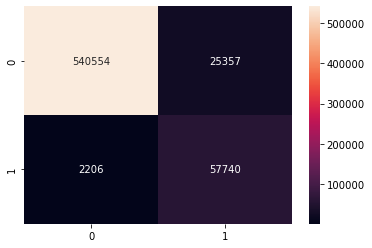

*******************************************


In [32]:
# training model with best hyperparameter

model=LGBMClassifier(boosting_type='gbdt', max_depth=- 1,
               learning_rate=0.1, n_estimators=hyperparameter[0],  num_leaves=hyperparameter[1],
               subsample_for_bin=200000, objective=None, 
               class_weight='balanced', min_split_gain=0.0, 
               min_child_weight=0.001, min_child_samples=20,
               subsample=1.0, subsample_freq=0, colsample_bytree=1.0,
               reg_alpha=0.0, reg_lambda=0.0, random_state=110, n_jobs=- 1)
print("Model is training")
model.fit(X_train,Y_train)
print("Done")
y_pred_proba=model.predict_proba(X_cv)
y_pred=model.predict(X_cv)
loss=result(y_pred,y_pred_proba,Y_cv,confusion=1)
print("*******************************************")

feature importance


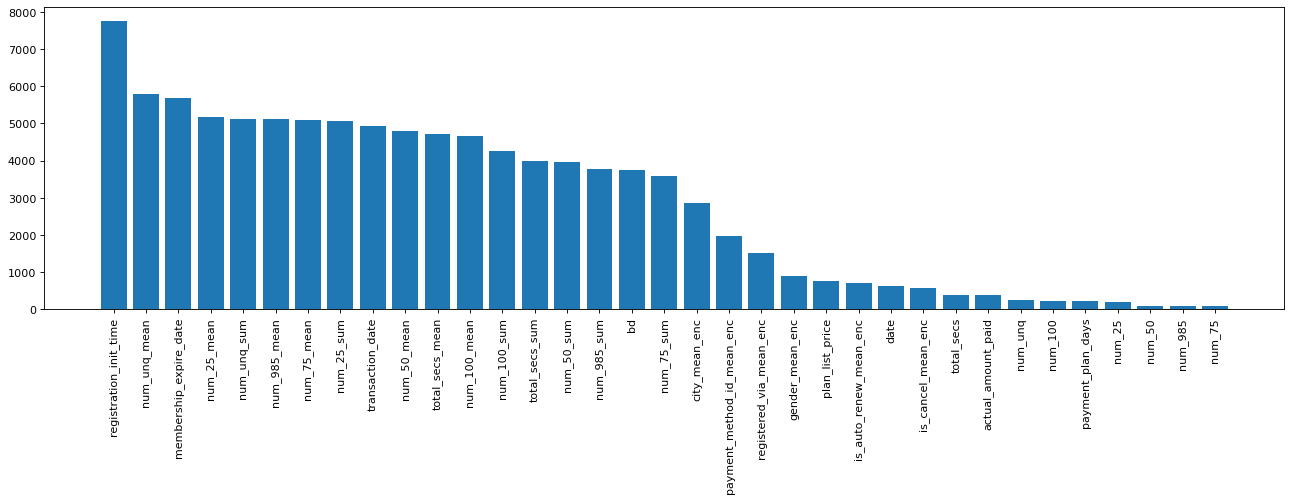

In [35]:
train_features=X_train.columns
from matplotlib.pyplot import figure
figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(model.feature_importances_)[::-1]]
feature_importance=[model.feature_importances_[i] for i in np.argsort(model.feature_importances_)[::-1]]
print("feature importance")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_lgb.append(feature_name)
feature_importance_values_lgb.append(feature_importance)